In [1]:
import qiskit as qk
from numpy import pi
from qiskit import *
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys = QuantumRegister(2)
anc = QuantumRegister(2)
cr = ClassicalRegister(2)
cir = QuantumCircuit(sys, anc, cr)

In [3]:
# Energy eigenvalues, in rad.THz:
energy  = [2466.33, 2416.88, 2327.67, 2280.44]
#in ps
step_size =.01
iterations=50
init = False

In [11]:
 
    
def rzx(cir, angx, angz, cqub, qub):
    cir.crz(2*angz, cqub, qub)
    cir.crx(angx, cqub, qub)

def ctrzx(cir, angx, angz, cqub, qub):
    cir.crx(-angx, cqub, qub)
    cir.crz(-2*angz, cqub, qub)
    
def phase(cir, cont, anc, ang):
    cir.ccx(cont[0], cont[1], anc[0])
    cir.crz(2*ang, anc[0], anc[1])
    cir.ccx(cont[0], cont[1], anc[0])
    
def ctphase(cir, cont, anc, ang):
    cir.ccx(cont[0], cont[1], anc[0])
    cir.crz(-2*ang, anc[0], anc[1])
    cir.ccx(cont[0], cont[1], anc[0])   
#~~~~~~~~#
#coppied

def state_initialization(cir,sys,anc,init):
    cir.x(anc[1])
    if (init):
        cir.x(sys[1])
        cir.x(sys[0])
        
#coppied and changed

def two_qubit_cir(cir,sys,anc,cr, energy, step_size, cycles, init):
    state_initialization(cir,sys,anc,init)
    cir.barrier()
    #~~~~
    ubtCir(cir,sys,anc)    
    evolution(cir,sys,anc,cycles*step_size,energy)
    ctubtCir(cir,sys,anc)
    #~~~~
    cir.barrier()
    cir.measure(sys,cr)

In [12]:
"""""""*********************   U (Computational basis -> Energy basis)   *****************************"
["ERot_zx (-1.5707964) (-1.2808427) 0 1",
 "ERot_zx (-0.7853982) (-0.2392549) 0 2",
 "ERot_zx (-0.39269906) (-6.3581735e-2) 0 3",
 "ERot_zx (-1.9634955) (-0.37570226) 1 2",
 "ERot_zx (-1.1780972) (-0.1030699) 1 3",
 "ERot_zx (-2.159845) (-1.2680272) 2 3",
 "ERot_phase (-1.2762719) 3",
 "ERot_phase (-2.8470685) 2",
 "ERot_phase 2.3561945 1",
 "ERot_phase 1.767146 0"]
""""""
["ERot_zx (-1.5707964) (-1.2808391) 0 1"
 ,"ERot_zx (-0.7853982) (-0.23925155) 0 2"
 ,"ERot_zx (-0.392699) (-6.359089e-2) 0 3"
 ,"ERot_zx (-1.9634955) (-0.37569928) 1 2"
 ,"ERot_zx (-1.1780972) (-0.103078015) 1 3"
 ,"ERot_zx (-2.159845) (-1.2680365) 2 3"
 ,"ERot_phase 1.8653208 3"
 ,"ERot_phase (-2.8470683) 2"
 ,"ERot_phase 2.3561945 1"
 ,"ERot_phase 1.767146 0"]

['ERot_zx (-1.5707964) (-1.2808391) 0 1',
 'ERot_zx (-0.7853982) (-0.23925155) 0 2',
 'ERot_zx (-0.392699) (-6.359089e-2) 0 3',
 'ERot_zx (-1.9634955) (-0.37569928) 1 2',
 'ERot_zx (-1.1780972) (-0.103078015) 1 3',
 'ERot_zx (-2.159845) (-1.2680365) 2 3',
 'ERot_phase 1.8653208 3',
 'ERot_phase (-2.8470683) 2',
 'ERot_phase 2.3561945 1',
 'ERot_phase 1.767146 0']

In [13]:
def ctubtCir(cir, sys, anc):
    cir.x(sys[1])
    ctrzx(cir, -1.2808427, -1.5707964, sys[1], sys[0])
    cir.x(sys[1])
    cir.barrier()
    
    cir.x(sys[0])
    ctrzx(cir, -0.2392549, -0.7853982, sys[0], sys[1])
    cir.x(sys[0])
    cir.barrier()
    
    cir.x(sys[1])
    cir.cx(sys[1], sys[0])
    cir.x(sys[1])
    ctrzx(cir, -0.63581735, -0.39269906, sys[0], sys[1])
    cir.x(sys[1])
    cir.cx(sys[1], sys[0])
    cir.x(sys[1])
    cir.barrier()

    cir.cx(sys[0], sys[1])
    ctrzx(cir, -0.37570226, -1.9634955, sys[1], sys[0])
    cir.cx(sys[0], sys[1])
    cir.barrier()
    
    ctrzx(cir, -0.1030699, -1.1780972, sys[0], sys[1])
    cir.barrier()
    
    ctrzx(cir, -1.2680272, -2.159845, sys[1], sys[0])
    cir.barrier()
    
    ctphase(cir, sys, anc, 1.8653208)
    cir.barrier()
    
    cir.x(sys[0])
    ctphase(cir, sys, anc, -2.8470685)
    cir.x(sys[0])
    cir.barrier()
    
    cir.x(sys[1])
    ctphase(cir, sys, anc, 2.3561945)
    cir.x(sys[1])
    cir.barrier()
    
    cir.x(sys[0])
    cir.x(sys[1])
    ctphase(cir, sys, anc, 1.767146)
    cir.x(sys[1])
    cir.x(sys[0])
    cir.barrier()
    cir.barrier()

In [14]:
def ubtCir(cir, sys, anc):
    cir.x(sys[1])
    cir.x(sys[0])
    phase(cir, sys, anc, 1.767146)
    cir.x(sys[0])
    cir.x(sys[1])
    cir.barrier()
    
    cir.x(sys[1])
    phase(cir, sys, anc, 2.3561945)
    cir.x(sys[1])
    cir.barrier()
    
    cir.x(sys[0])
    phase(cir, sys, anc, -2.8470685)
    cir.x(sys[0])
    cir.barrier()
    
    phase(cir, sys, anc, 1.8653208)
    cir.barrier()
    
    rzx(cir, -1.2680272, -2.159845, sys[1], sys[0])
    cir.barrier()
    
    rzx(cir, -0.1030699, -1.1780972, sys[0], sys[1])
    cir.barrier()
    
    cir.cx(sys[0], sys[1])
    rzx(cir, -0.37570226, -1.9634955, sys[1], sys[0])
    cir.cx(sys[0], sys[1])
    cir.barrier()
    
    cir.x(sys[1])
    cir.cx(sys[1], sys[0])
    cir.x(sys[1])
    rzx(cir, -.063581735, -0.39269906, sys[0], sys[1])
    cir.x(sys[1])
    cir.cx(sys[1], sys[0])
    cir.x(sys[1])
    cir.barrier()
    
    cir.x(sys[0])
    rzx(cir, -0.2392549, -0.7853982, sys[0], sys[1])
    cir.x(sys[0])
    cir.barrier()
    
    cir.x(sys[1])
    rzx(cir, -1.2808427, -1.5707964, sys[1], sys[0])
    cir.x(sys[1])
    cir.barrier()
    cir.barrier()

In [16]:
def evolution(cir, sys, anc, t, energy):
    cir.x(sys[0:2])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.crz(-energy[0]*t, anc[0],anc[1])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.x(sys[0:2])
    cir.barrier()

    cir.x(sys[1])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.crz(-energy[1]*t, anc[0], anc[1])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.x(sys[1])
    cir.barrier()

    cir.x(sys[0])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.crz(-energy[2]*t, anc[0],anc[1])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.x(sys[0])
    cir.barrier()


    cir.ccx(sys[0], sys[1], anc[0])
    cir.crz(-energy[3]*t, anc[0],anc[1])
    cir.ccx(sys[0], sys[1], anc[0])
    cir.barrier()    
    cir.barrier()



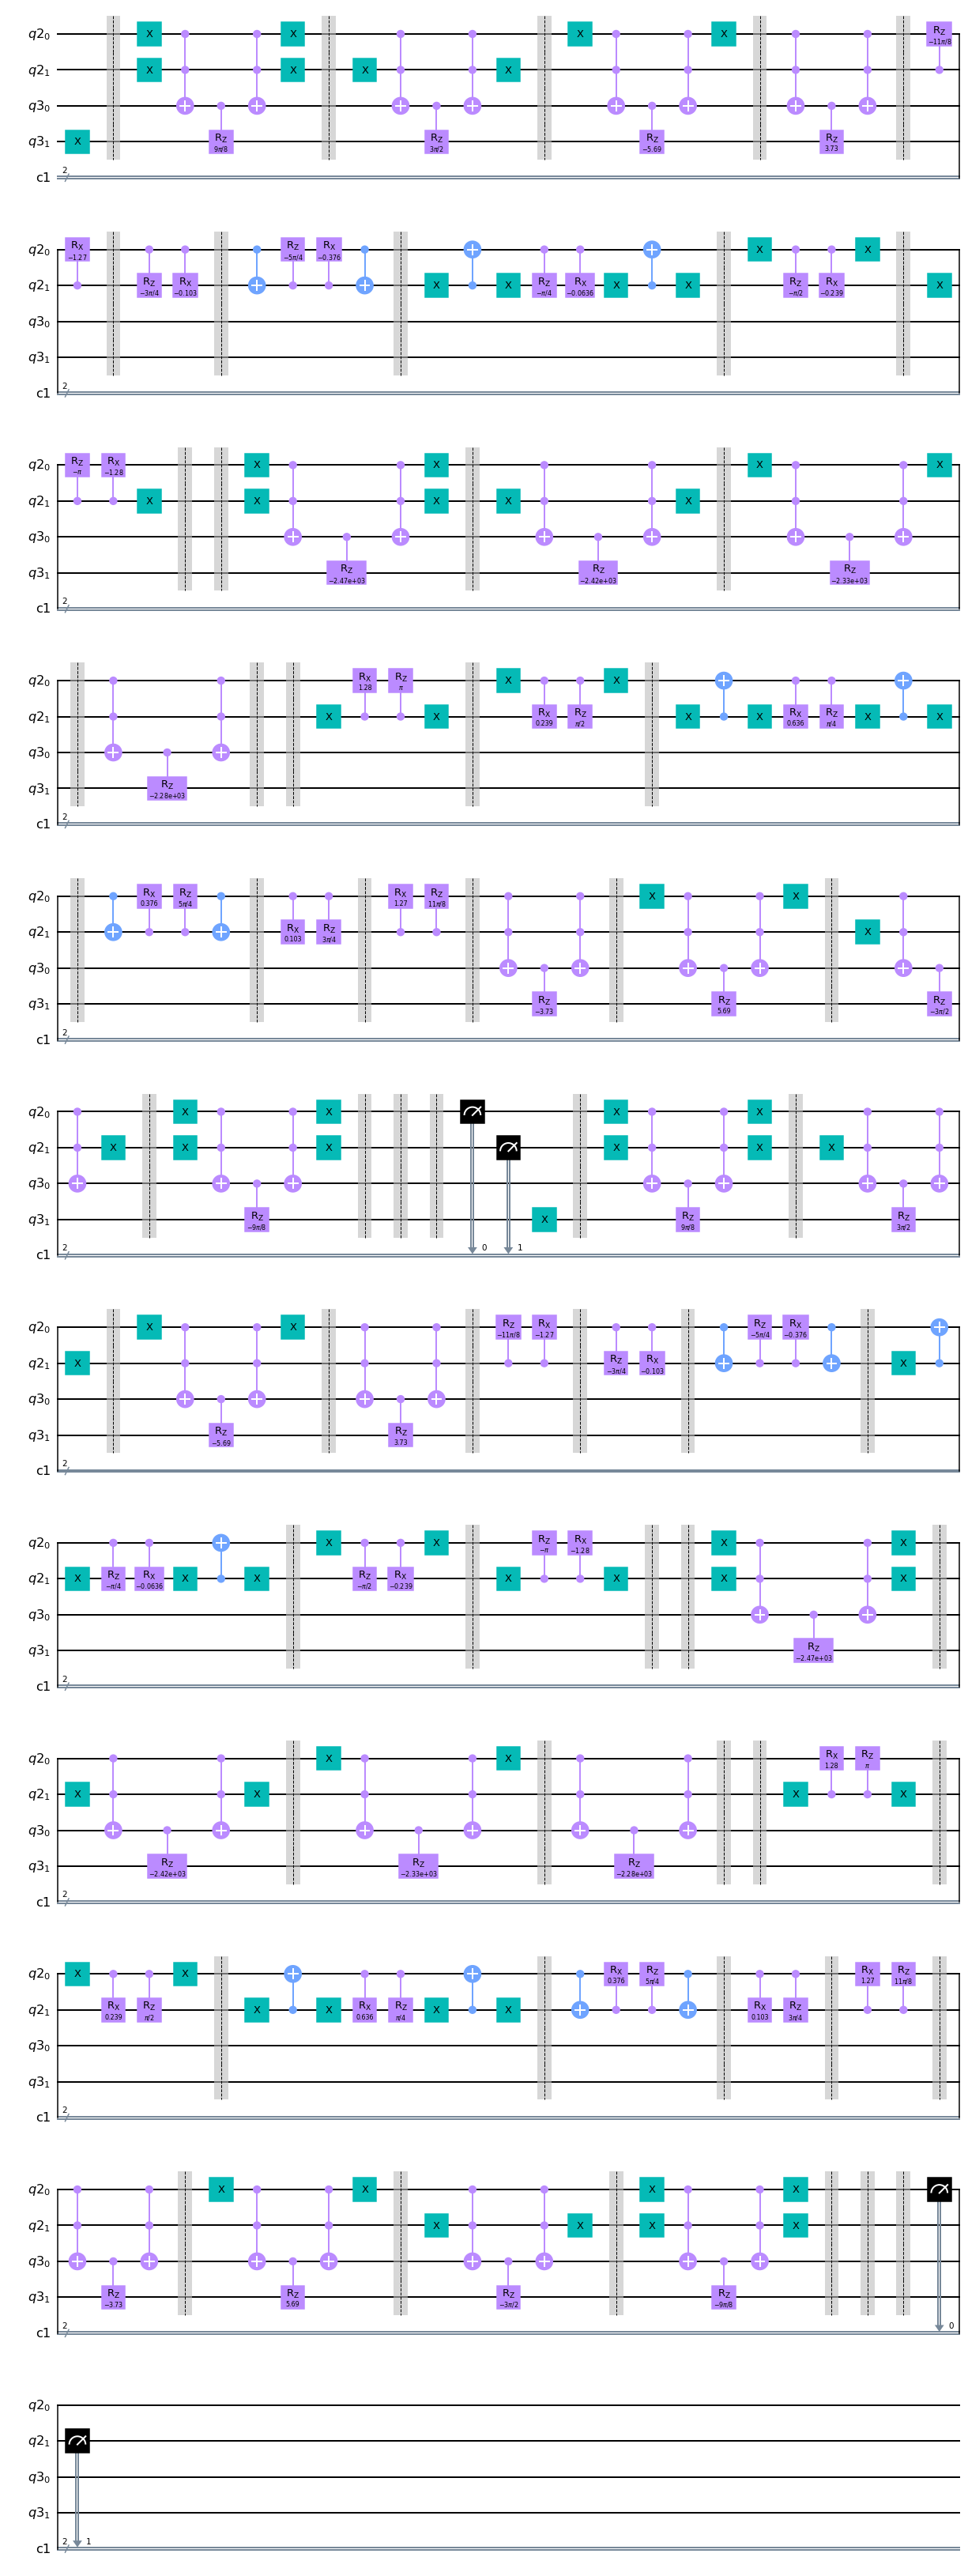

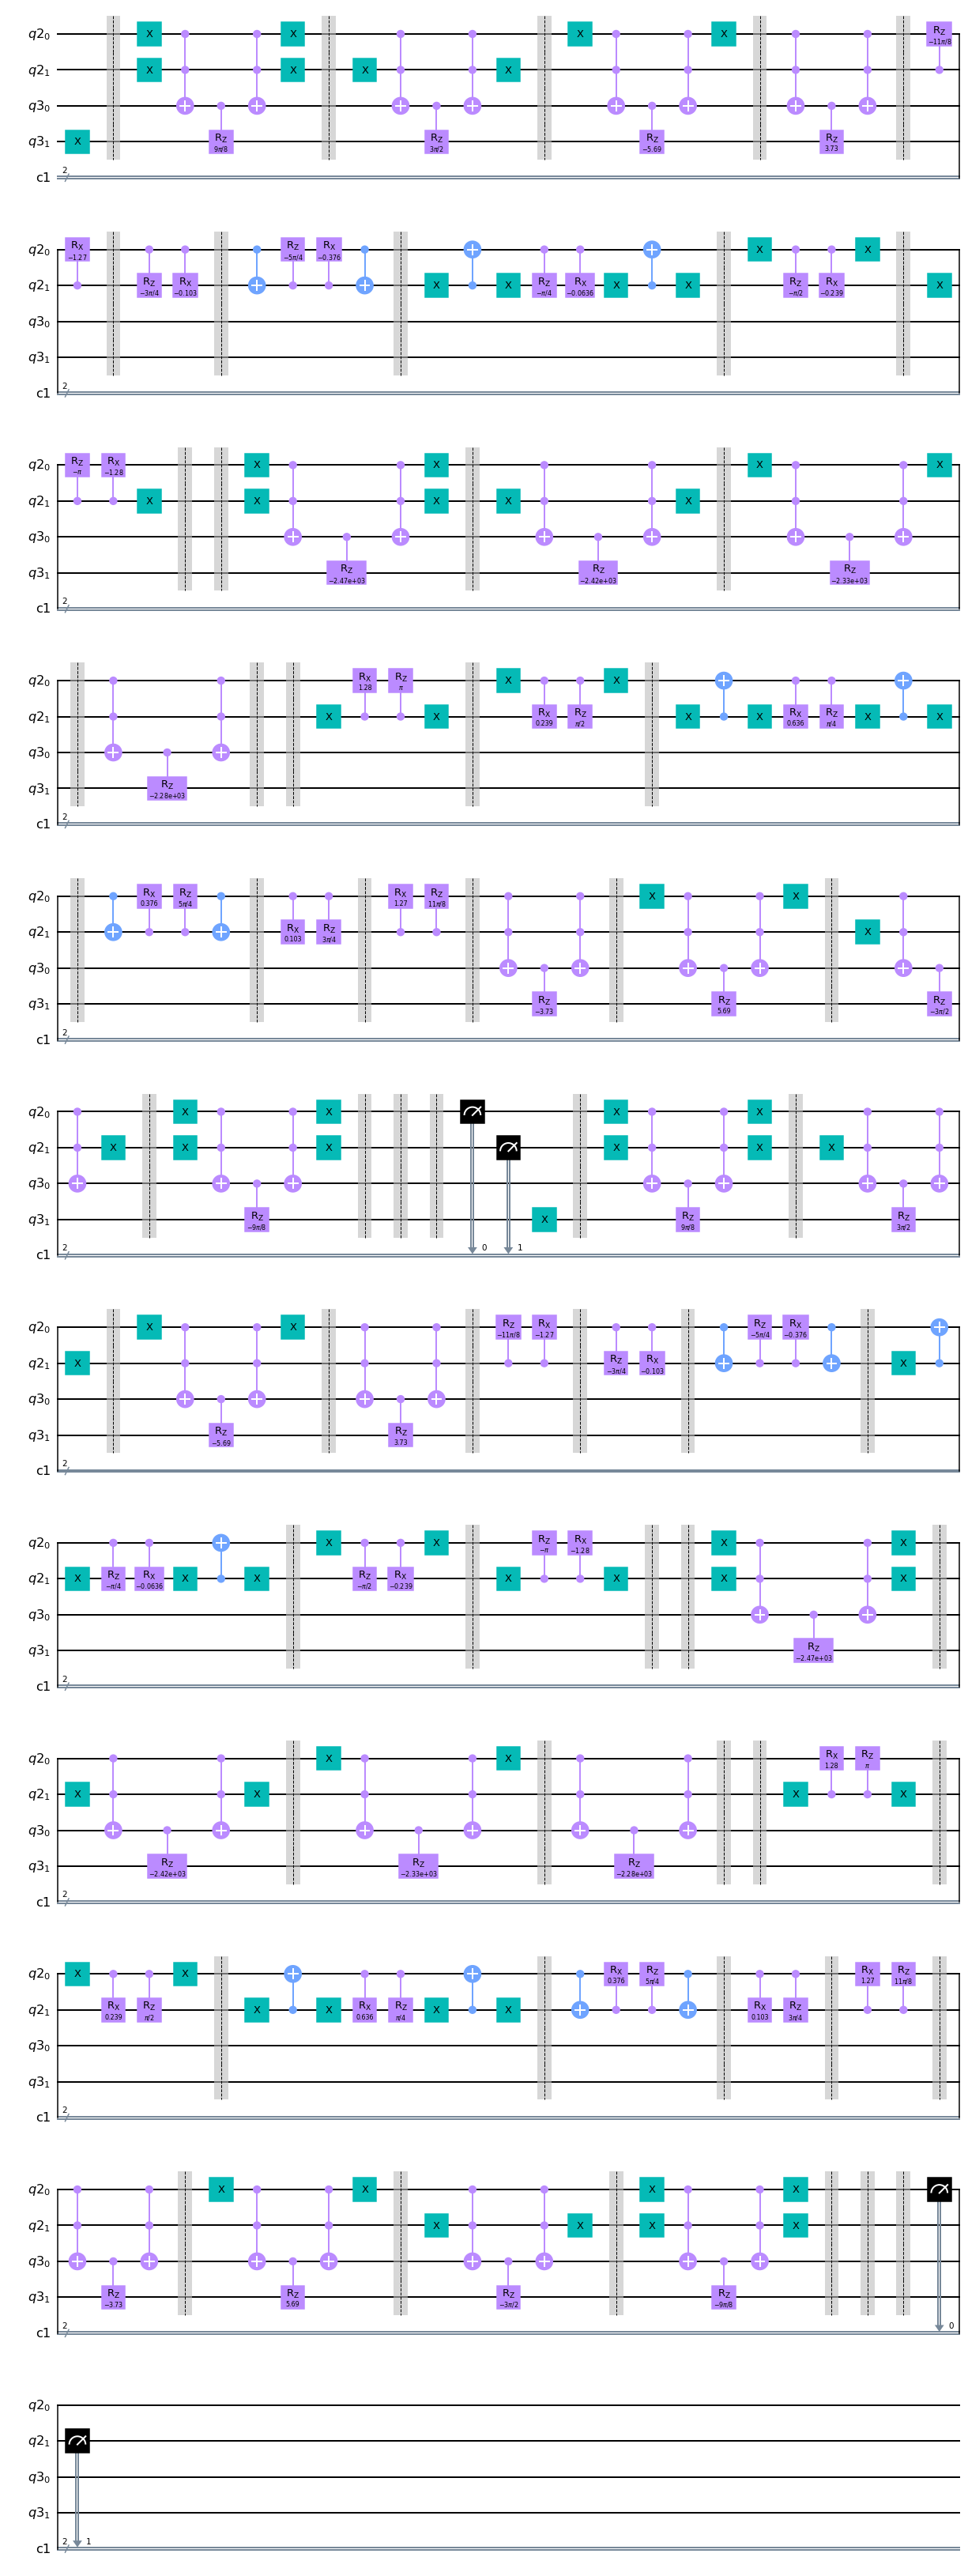

In [17]:

cir.draw(output = "mpl")

In [18]:
sys = QuantumRegister(2)
anc = QuantumRegister(2)
cr = ClassicalRegister(2)
cir = QuantumCircuit(sys, anc, cr)



def graphic(sys,anc,cr,energy,step_size,iterations,init):
    x=[]
    y1=[]
    y2=[]
    y3=[]
    y4=[]
    p1=0
    p2=0
    p3=0
    p4=0
    for cycles in range(0,iterations):
        qc = QuantumCircuit(sys, anc, cr)
        two_qubit_cir(qc,sys,anc,cr, energy, step_size, cycles, init) 
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = execute(qc, backend_sim, shots=5000)
        result_sim = job_sim.result()
        result_counts = result_sim.get_counts(qc)
        
        if '00' in result_counts:
            p1+=result_counts['00']/5000
        else:
            p1=0
        if '01' in result_counts:
            p2+=result_counts['01']/5000
        else:
            p2=0
        if '10' in result_counts:
            p3+=result_counts['10']/5000
        else:
            p3=0
        if '11' in result_counts:
            p4+=result_counts['11']/5000
        else:
            p4=0
        x.append(step_size*cycles)
        y1.append(p1)
        y2.append(p2)
        y3.append(p3)
        y4.append(p4)
        p1=0
        p2=0
        p3=0
        p4=0
        
    la = plt.scatter(x,y1,c='b',marker="^",label='Simulation - P(0)')
    lb = plt.scatter(x,y2,c='r',label='Simulation - P(1)')
    lc = plt.scatter(x,y3,c='g',marker="s", label='Simulation - P(2)')
    ld = plt.scatter(x,y4,c="black",marker="X",label='Simulation - P(3)')
    ll = plt.legend(loc=7)
    lx = plt.xlabel('Time (ps)')
    ly = plt.ylabel('Probability')
    xx = plt.xlim(0,cycles*step_size)
    ll = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    two_qubit_cir(cir,sys,anc,cr,energy,step_size,iterations,init)
    cir.draw(output='mpl')

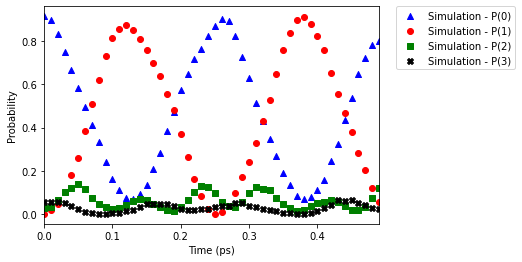

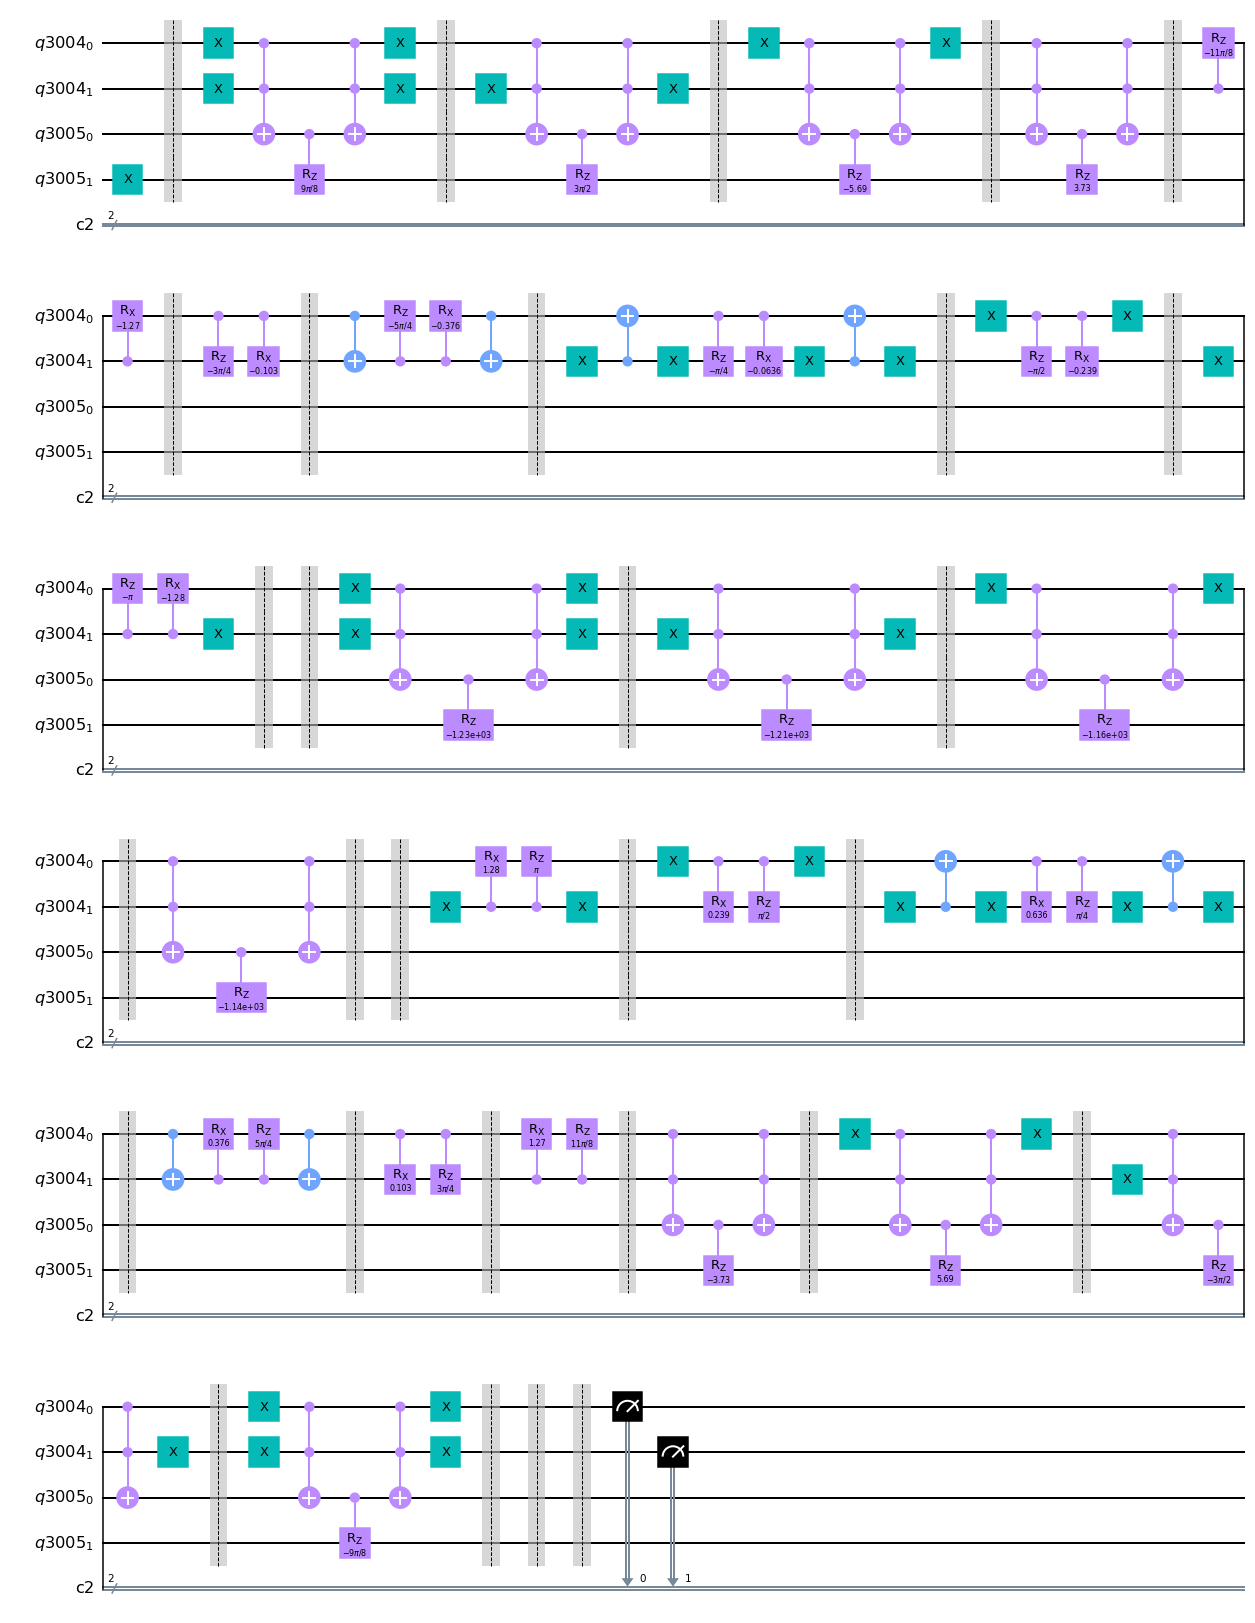

In [19]:
graphic(sys,anc,cr,energy,step_size,iterations,init)